In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
##Parameter definitions (SI)
M =1783
V = 50/3.6  #m/s
k1 = k2 = 2.8 * 10**7
c1 = c2 = 5 * 10**4
a = 1.22
b = 1.5
Ic = 4000
e = 0.75
L = 0.5
A = 0.06
f = 0.35
f_e = 35 #2100/60
m_e = 20
w_e = 2*(np.pi)*f_e
w = 2*np.pi*(V/L)    
r = 0.045
Fn = m_e*(w_e**2)*r

In [5]:

def d1(t):
  if t>2:
    return 0
  return A*(1-np.cos(w*t))
def d2(t):
  if t>2:
    return 0
  return A*(1+np.cos(w*t))
def d1_dot(t):
  if t>2:
    return 0
  return A*w*np.sin(w*t)
def d2_dot(t): 
  if t>2:
    return 0
  return -A*w*np.sin(w*t)

In [19]:
def F(t, Y):
  K = np.zeros(4)
  x = Y[0]
  theta = Y[1]
  u = Y[2]
  v = Y[3]
  K[0] = u 
  K[1] = v 
  K[2] = (-(k1+k2)*x+(k1*a-k2*b)*theta-(c1+c2)*u+(c1*a-c2*b)*v+k1*d1(t)+k2*d2(t)+c1*d1_dot(t)+c2*d2_dot(t)+Fn*np.sin(w_e*t))/M     
  K[3] = ((k1*a-k2*b)*x-(k1*a**2+k2*b**2)*theta+(c1*a-c2*b)*u-(c1*a**2+c2*b**2)*v-k1*a*d1(t)+k2*b*d2(t)-c1*a*d1_dot(t)+c2*b*d2_dot(t)-Fn*(e*np.sin(w_e*t)+f*np.cos(w_e*t)))/Ic
  return K

In [20]:
def rk4_solver(Y0, t0, tf, h):
  iterations  = int(np.floor((tf-t0)/h))
  Y = Y0
  #print("t0 ", t0)
  #print("tf ", tf)
  #print("iterations? ", iterations)
  for i in range(iterations):
    t_i = t0 + h*i
    K1 = F(t_i, Y)
    K2 = F(t_i + 0.5*h, Y + 0.5*h*K1)
    K3 = F(t_i + 0.5*h, Y + 0.5*h*K2)
    K4 = F(t_i+ h, Y + h*K3)
    Y += (h/6)*(K1+2*K2+2*K3+K4)
  return Y

In [21]:
Y0 = np.array([0, 0.09, 0, 0])
t0 = 0
tf = 4
h_s = 0.01    #small
h_m = 0.04    #medium
h_l = 0.4     #large 

In [22]:
#Plotting
n = 1000
t_sampled = np.linspace(t0, tf, n) #array of instants to evaluate Y

Y = np.zeros((n,4))
for i in range(n):
  Y[i] = rk4_solver(Y0, t0, t_sampled[i], h_s) 
  
Z = np.transpose(Y)

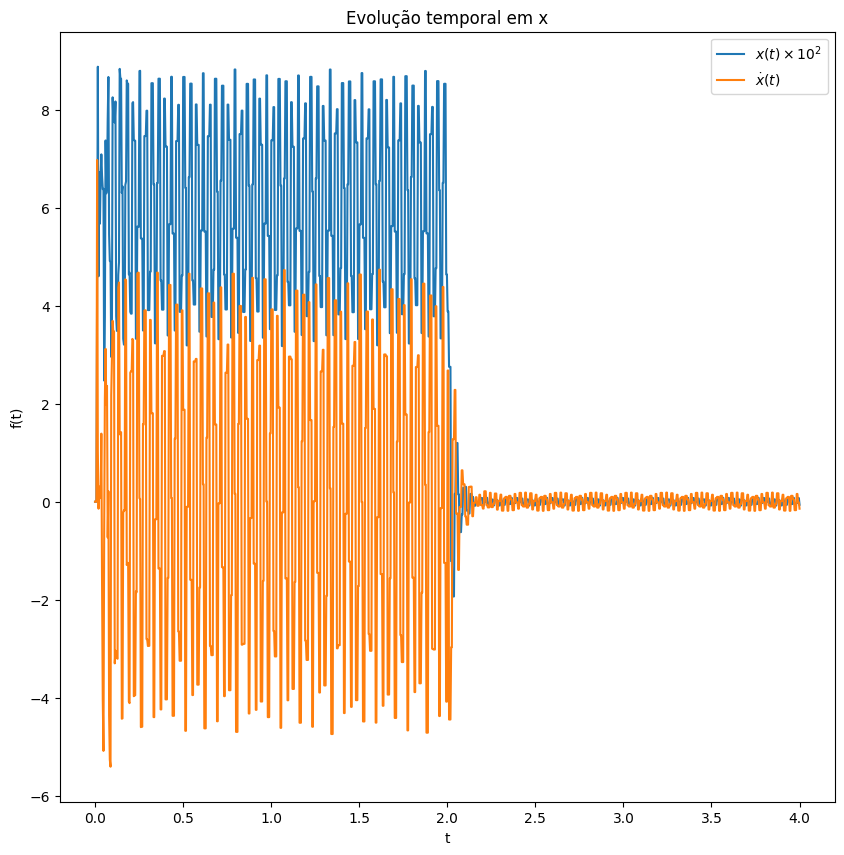

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_sampled, 100*Z[0], label=r'$x(t) \times 10^2$')  
ax.plot(t_sampled, Z[2], label=r'$\dot{x}(t)$')  
ax.set_xlabel('t')  
ax.set_ylabel('f(t)')  
ax.set_title("Evolução temporal em x")  
ax.legend() 



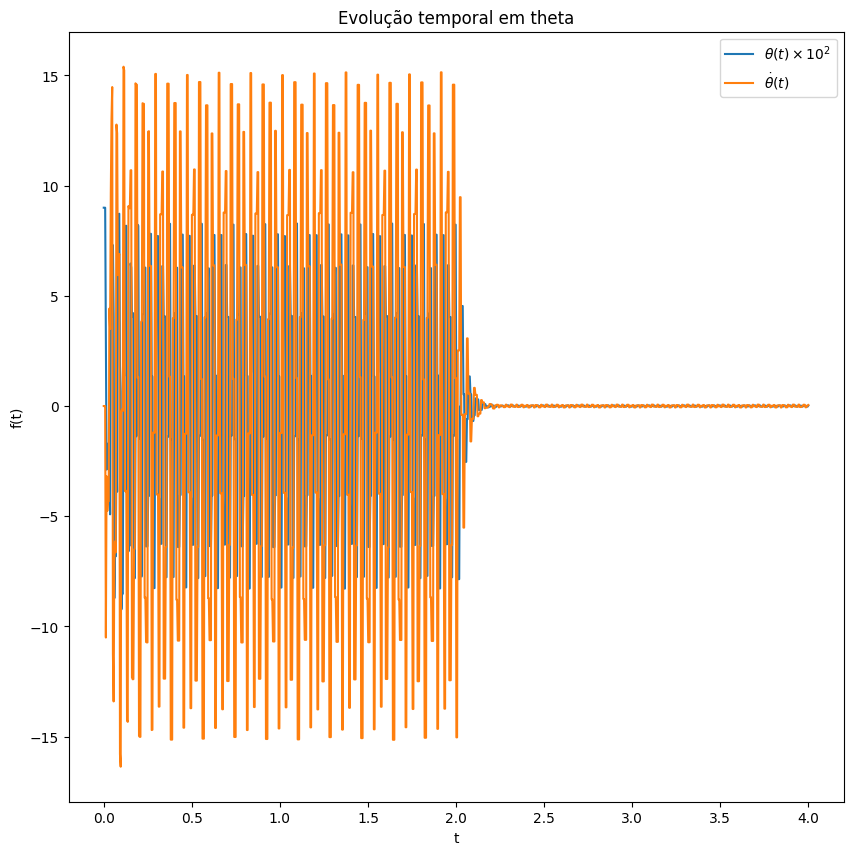

In [24]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_sampled, 100*Z[1], label=r'$\theta(t) \times 10^2$')  
ax.plot(t_sampled, Z[3], label=r'$\dot{\theta}(t)$')  
ax.set_xlabel('t')  
ax.set_ylabel('f(t)')  
ax.set_title("Evolução temporal em theta")  
ax.legend() 
plt.show()